In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('bank-full.csv', sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
sample=data.sample(frac=0.3, replace=False, random_state=1)

In [5]:
technicians=data[data['job']=='technician']

In [6]:
retired_negative_balance=data[(data['job']=='retired') & (data['balance']<0)]

In [7]:
data=data.drop(columns=['day', 'month']) 

In [8]:
data=data.rename(columns={'job':'occupation', 'housing':'RE'})

In [9]:
average_balance=data['balance'].mean()

In [10]:
summary=data.groupby('y').mean()

In [11]:
summary

,age,balance,duration,campaign,pdays,previous
y,,,,,,
no,40.838986,1303.714969,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354


In [12]:
technicians_with_housing=technicians['housing'].count()

In [13]:
data['contacts']=data.campaign+data.previous

In [14]:
data['average_of_contacts']=data.groupby('occupation')['contacts'].transform('mean')

In [15]:
data.sort_values(by=['previous', 'balance'], ascending=False)

,age,occupation,marital,education,default,balance,RE,loan,contact,duration,campaign,pdays,previous,poutcome,y,contacts,average_of_contacts
29182,40,management,married,tertiary,no,543,yes,no,cellular,349,2,262,275,other,no,277,3.532354
38326,46,blue-collar,married,primary,no,1085,yes,yes,cellular,523,2,353,58,other,yes,60,3.322133
44089,37,technician,married,secondary,no,432,yes,no,cellular,386,3,776,55,failure,yes,58,3.481374
28886,31,management,single,tertiary,no,358,yes,no,cellular,68,3,256,51,failure,no,54,3.532354
44822,27,blue-collar,married,secondary,no,821,yes,yes,unknown,23,1,778,41,other,no,42,3.322133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,153,1,-1,0,unknown,no,1,3.404687
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,386,2,-1,0,unknown,no,2,3.532354
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,242,6,-1,0,unknown,no,6,3.532354
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,206,1,-1,0,unknown,no,1,3.532354


<AxesSubplot:xlabel='occupation'>

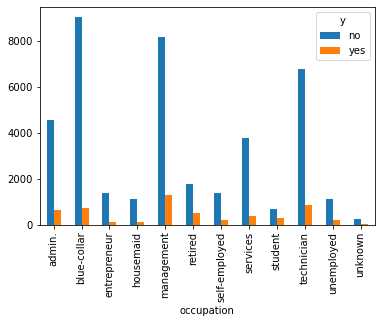

In [16]:
pd.crosstab(data.occupation, data.y).plot(kind='bar')

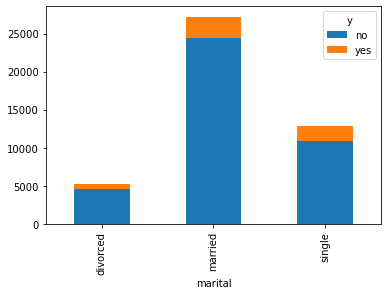

In [17]:
table=pd.crosstab(data.marital, data.y).plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='education'>

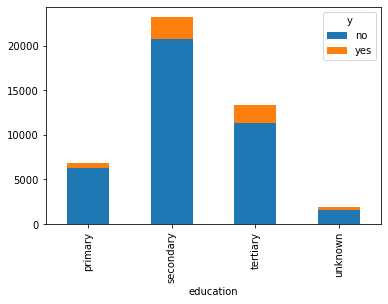

In [18]:
pd.crosstab(data.education, data.y).plot(kind='bar', stacked=True)

<AxesSubplot:>

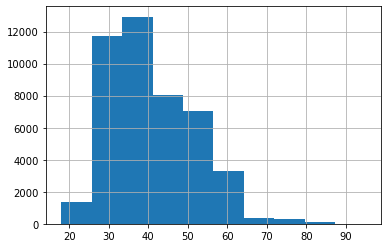

In [19]:
data.age.hist()

<AxesSubplot:xlabel='poutcome'>

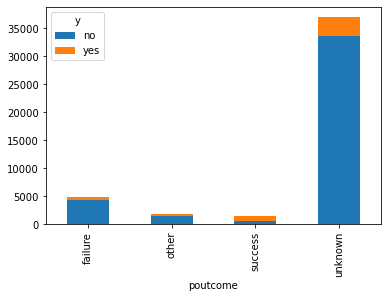

In [20]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar', stacked=True)

In [21]:
data.head()

,age,occupation,marital,education,default,balance,RE,loan,contact,duration,campaign,pdays,previous,poutcome,y,contacts,average_of_contacts
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,1,3.532354
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,1,3.481374
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,1,3.277740
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,1,3.322133
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,1,3.628472


In [22]:
categories=['occupation', 'marital', 'education', 'default', 'RE', 'loan', 'contact', 'poutcome']
for i in categories:
    categories='i'+'_'+i
    categories=pd.get_dummies(data[i], prefix=i)
    sample=data.join(categories)
    data=sample

In [23]:
categories=['occupation', 'marital', 'education', 'default', 'RE', 'loan', 'contact', 'poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categories]

In [24]:
data_model=data[to_keep]

In [25]:
x=data_model.loc[:, data_model.columns !='y']
y=data_model.loc[:, data_model.columns =='y']

In [26]:
import statsmodels.api as sm

In [27]:
y=y.eq('yes').mul(1)

In [28]:
x=x.drop(columns=['default_no', 'default_yes', 'loan_yes', 'loan_no', 'age', 'pdays', 'contacts', 'RE_yes', 'RE_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'occupation_unemployed', 'occupation_unknown', 'marital_divorced', 'education_secondary', 'education_unknown']) #'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 

In [29]:
model=sm.Logit(y.astype(float),x.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.263174
         Iterations 7


In [30]:
print(model.summary2())

                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.271     
Dependent Variable:     y                  AIC:                23842.7076
Date:                   2022-02-04 12:02   BIC:                24043.2468
No. Observations:       45211              Log-Likelihood:     -11898.   
Df Model:               22                 LL-Null:            -16315.   
Df Residuals:           45188              LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
balance                   0.0000   0.0000   5.9718 0.0000  0.0000  0.0000
duration                  0.0039   0.0001  64.4030 0.0000  0.0037  0